In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

##### 数据导入,注意：path换成windAshare数据文件的父目录

In [2]:
path = '/Users/hmt/Documents/PHBS/courses/investment/project/data/wind底层库数据/'

In [3]:
#数据导入，使用 WIND 全 A 指数做的日历效应分析
windAshare = pd.read_csv(f'{path}/windAshare.csv',usecols=[1,2,4,5,6,7,8,9,10,11,12])
windAshare['TRADE_DT'] = pd.to_datetime(windAshare['TRADE_DT'],format='%Y%m%d')

In [4]:
windAshare

,S_INFO_WINDCODE,TRADE_DT,S_DQ_PRECLOSE,S_DQ_OPEN,S_DQ_HIGH,S_DQ_LOW,S_DQ_CLOSE,S_DQ_CHANGE,S_DQ_PCTCHANGE,S_DQ_VOLUME,S_DQ_AMOUNT
0,881001.WI,1994-12-30,376.6529,377.9917,385.0433,372.6178,379.3402,2.6873,0.7135,1299702.0,8.747338e+05
1,881001.WI,1995-01-03,379.3402,371.8919,381.6243,365.0925,375.9952,-3.3450,-0.8818,430529.0,2.849094e+05
2,881001.WI,1995-01-04,375.9952,375.6247,388.2055,372.2132,385.7705,9.7753,2.5998,822723.0,5.271009e+05
3,881001.WI,1995-01-05,385.7705,386.8173,391.3139,378.7109,381.6151,-4.1554,-1.0772,962234.0,6.055048e+05
4,881001.WI,1995-01-06,381.6151,378.0903,382.8848,372.8513,379.3633,-2.2518,-0.5901,801722.0,5.199489e+05
...,...,...,...,...,...,...,...,...,...,...,...
7102,881001.WI,2024-04-02,4519.0707,4516.4742,4516.4895,4481.6533,4500.5372,-18.5335,-0.4101,902136685.0,9.724334e+08
7103,881001.WI,2024-04-03,4500.5372,4494.0320,4497.8661,4459.3766,4478.8871,-21.6501,-0.4811,860993505.0,9.224698e+08
7104,881001.WI,2024-04-08,4478.8871,4463.1279,4471.6097,4415.8747,4416.1446,-62.7425,-1.4009,887832394.0,9.357785e+08
7105,881001.WI,2024-04-09,4416.1446,4411.2872,4440.5141,4400.1451,4439.7638,23.6192,0.5348,749875199.0,7.996539e+08


In [7]:
windAshare[['TRADE_DT','S_DQ_PCTCHANGE']]

,TRADE_DT,S_DQ_PCTCHANGE
0,1994-12-30,0.7135
1,1995-01-03,-0.8818
2,1995-01-04,2.5998
3,1995-01-05,-1.0772
4,1995-01-06,-0.5901
...,...,...
7102,2024-04-02,-0.4101
7103,2024-04-03,-0.4811
7104,2024-04-08,-1.4009
7105,2024-04-09,0.5348


# 1.星期一效应，注意最后一个图是斜对齐

/var/folders/zc/8rx9dq3s43532nrt81930nnm0000gn/T/ipykernel_55872/3996592947.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={'TRADE_DT':'Date','S_DQ_PCTCHANGE':'Return'},inplace=True)
/var/folders/zc/8rx9dq3s43532nrt81930nnm0000gn/T/ipykernel_55872/3996592947.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Return'] = data['Return']/100
/var/folders/zc/8rx9dq3s43532nrt81930nnm0000gn/T/ipykernel_55872/3996592947.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

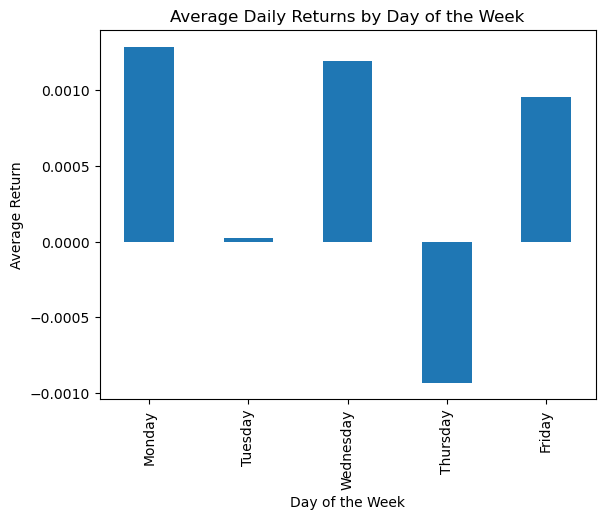

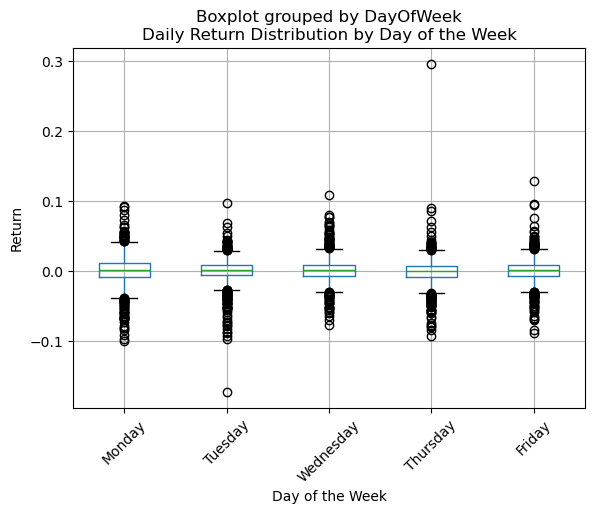

T-test: t-statistic = 1.6632167655153538, p-value = 0.09643373597589905
ANOVA F-statistic: 4.075933183802436, p-value: 0.00265686582240458
No statistically significant Monday Effect found.


In [9]:
data = windAshare[['TRADE_DT','S_DQ_PCTCHANGE']]
data.rename(columns={'TRADE_DT':'Date','S_DQ_PCTCHANGE':'Return'},inplace=True)
data.set_index('Date', inplace=True)

# Step 2: 数据准备
# 计算每日收益率
data['Return'] = data['Return']/100
# 提取每条记录的星期几
data['DayOfWeek'] = data.index.dayofweek

# Step 3: 统计分析
# 分组获取星期一与其他日子的收益率
monday_returns = data[data['DayOfWeek'] == 0]['Return']
other_days_returns = data[data['DayOfWeek'] != 0]['Return']

# T-检验
t_stat, p_value = stats.ttest_ind(monday_returns, other_days_returns, equal_var=False)

# ANOVA
anova_result = stats.f_oneway(
    *[data[data['DayOfWeek'] == i]['Return'].dropna() for i in range(5)]
)

# Step 4: 可视化
# 每日平均收益率条形图
average_daily_returns = data.groupby('DayOfWeek')['Return'].mean()
average_daily_returns.plot(kind='bar')
plt.title('Average Daily Returns by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Return')
plt.xticks(ticks=range(5), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
plt.show()

# 收益率分布箱型图
data.boxplot(column='Return', by='DayOfWeek', rot=45)
plt.title('Daily Return Distribution by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Return')
plt.xticks(ticks=range(1,6), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
plt.show()

# Step 5: 解释结果
print(f"T-test: t-statistic = {t_stat}, p-value = {p_value}")
print(f"ANOVA F-statistic: {anova_result.statistic}, p-value: {anova_result.pvalue}")

# 判断是否存在显著的星期一效应
if p_value < 0.05:
    print("There is a statistically significant Monday Effect.")
else:
    print("No statistically significant Monday Effect found.")

 # 2.一月效应检验

In [69]:
#数据导入
windAshare = pd.read_csv(f'{path}/wind底层库数据/windAshare.csv',usecols=[1,2,4,5,6,7,8,9,10,11,12])
windAshare['TRADE_DT'] = pd.to_datetime(windAshare['TRADE_DT'],format='%Y%m%d')

/var/folders/zc/8rx9dq3s43532nrt81930nnm0000gn/T/ipykernel_25163/1518705262.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={'TRADE_DT':'Date','S_DQ_PCTCHANGE':'Return'},inplace=True)
/var/folders/zc/8rx9dq3s43532nrt81930nnm0000gn/T/ipykernel_25163/1518705262.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Return'] = data['Return']/100
/var/folders/zc/8rx9dq3s43532nrt81930nnm0000gn/T/ipykernel_25163/1518705262.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

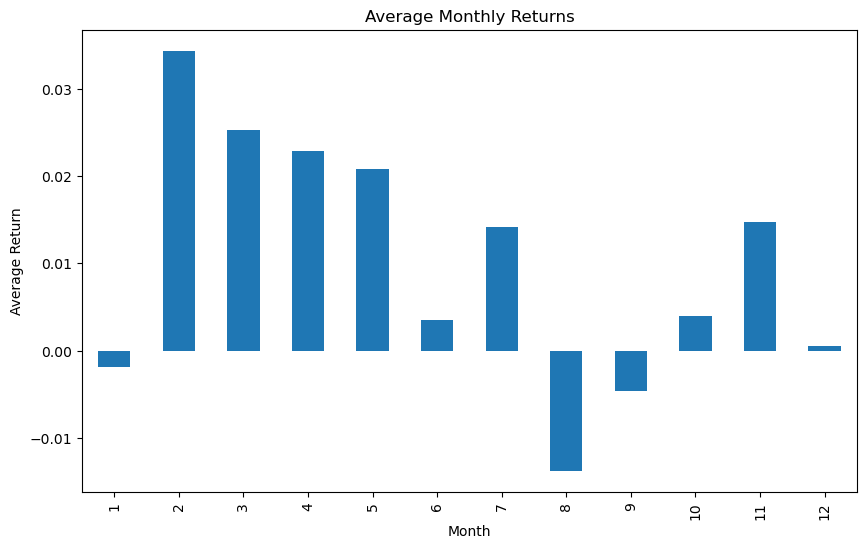

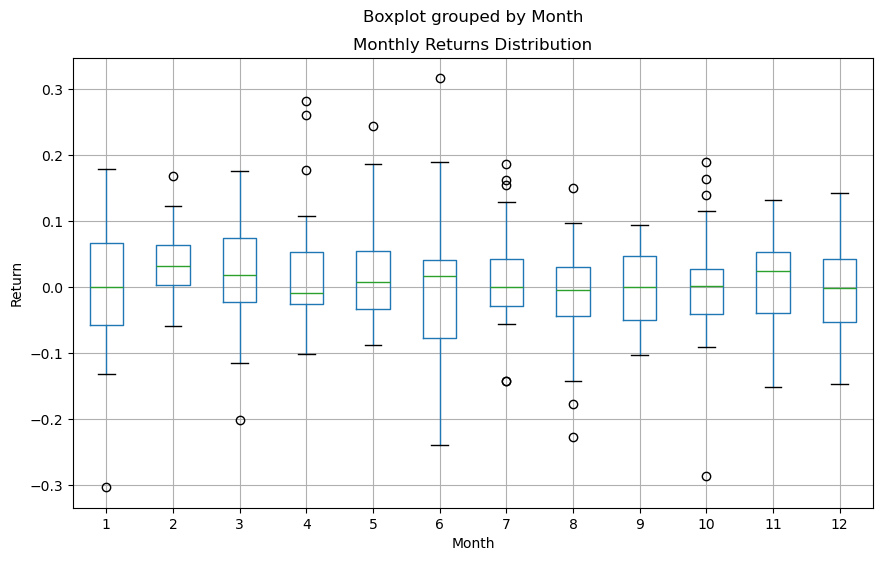

T-test: t-statistic = -0.8371234635698094, p-value = 0.4030927696632971
ANOVA F-statistic = 0.8886779677891486, p-value = 0.5516912465809519
No statistically significant January Effect found.


In [93]:
data = windAshare[['TRADE_DT','S_DQ_PCTCHANGE']]
data.rename(columns={'TRADE_DT':'Date','S_DQ_PCTCHANGE':'Return'},inplace=True)
data.set_index('Date', inplace=True)

# Step 2: 数据准备
#  计算每日收益率
data['Return'] = data['Return']/100
# 为每个月添加一个月份标签
data['Month'] = data.index.month

# 计算每月收益率
monthly_returns = data.groupby(data.index.to_period('M'))['Return'].sum().to_frame()
monthly_returns['Month'] = monthly_returns.index.month

# Step 3: 统计分析
# 提取一月与其他月份的收益率
january_returns = monthly_returns[monthly_returns['Month'] == 1]['Return']
other_months_returns = monthly_returns[monthly_returns['Month'] != 1]['Return']

# T-检验
t_stat, p_value = stats.ttest_ind(january_returns, other_months_returns.dropna())

# 方差分析（ANOVA）
# 请注意，下面的ANOVA实现方式可能需要根据你的数据集大小和结构进行调整
anova_result = stats.f_oneway(
    *[monthly_returns[monthly_returns['Month'] == i]['Return'].dropna() for i in range(1, 13)]
)

# Step 4: 可视化
# 每月平均收益率条形图
average_monthly_returns = monthly_returns.groupby('Month')['Return'].mean()
average_monthly_returns.plot(kind='bar', figsize=(10, 6))
plt.title('Average Monthly Returns')
plt.xlabel('Month')
plt.ylabel('Average Return')
plt.show()

# 收益率分布箱型图
monthly_returns.boxplot(column='Return', by='Month', figsize=(10, 6))
plt.title('Monthly Returns Distribution')
plt.xlabel('Month')
plt.ylabel('Return')
plt.show()

# Step 5: 解释结果
print(f"T-test: t-statistic = {t_stat}, p-value = {p_value}")
print(f"ANOVA F-statistic = {anova_result.statistic}, p-value = {anova_result.pvalue}")

# 判断是否存在显著的一月效应
if p_value < 0.05:
    print("There is a statistically significant January Effect.")
else:
    print("No statistically significant January Effect found.")